In [169]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset, random_split
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
from torch.utils.data import Dataset
import torchvision
import pandas as pd
from sklearn.model_selection import train_test_split

In [170]:
import os
from PIL import Image
from tqdm import tqdm
import numpy as np

In [171]:
class MyDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        sample = self.data.iloc[index].values
        return sample

In [173]:
data_path = "D:\\project\\dataset\\gen_land_marks_dataset\\LM_min_max .csv"


data = pd.read_csv(data_path)
data['sign_n'] = data['sign'].astype('category').cat.codes

data

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,y18,z18,x19,y19,z19,x20,y20,z20,sign,sign_n
0,0.495022,1.0,0.974262,0.828853,0.882998,0.436342,1.0,0.510281,0.408441,0.930107,...,0.450038,0.502614,0.118184,0.622809,0.617609,0.209679,0.693113,0.848838,a,0
1,0.469361,1.0,0.991974,0.819125,0.906074,0.445117,1.0,0.536335,0.404578,0.908042,...,0.454920,0.488348,0.112306,0.636905,0.570991,0.204856,0.676160,0.788405,a,0
2,0.493057,1.0,0.975774,0.835015,0.905123,0.418454,1.0,0.535364,0.372406,0.905587,...,0.472757,0.478108,0.124417,0.643154,0.549644,0.227330,0.688799,0.753638,a,0
3,0.497036,1.0,0.978554,0.829442,0.884008,0.451723,1.0,0.529599,0.374636,0.902809,...,0.466858,0.550284,0.121133,0.631655,0.627232,0.218818,0.672396,0.820793,a,0
4,0.506610,1.0,0.999308,0.848605,0.876080,0.461688,1.0,0.512127,0.425191,0.881576,...,0.465854,0.380969,0.125847,0.632779,0.530544,0.183727,0.672446,0.794712,a,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810,0.570976,1.0,1.000000,0.872495,0.895524,0.748421,1.0,0.628247,0.698132,0.697144,...,0.528894,0.000000,0.156402,0.660963,0.280768,0.161146,0.711858,0.537918,z,25
1811,0.628784,1.0,1.000000,0.928527,0.866675,0.428077,1.0,0.618804,0.344258,0.677055,...,0.539672,0.223838,0.160516,0.665505,0.417114,0.198585,0.721275,0.668195,z,25
1812,0.640344,1.0,1.000000,0.900157,0.863415,0.798249,1.0,0.574449,0.689323,0.779147,...,0.519328,0.001633,0.318658,0.647782,0.243037,0.272015,0.710939,0.493679,z,25
1813,0.468633,1.0,1.000000,0.805085,0.886132,0.742283,1.0,0.640918,0.579735,0.871521,...,0.496653,0.069213,0.308547,0.624861,0.221126,0.224839,0.681041,0.434460,z,25


In [174]:
class MyDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        sample = self.data.iloc[index].values
        sign_data =torch.Tensor(sample[:63].reshape(1, 21, 3).astype(float))
        return sign_data, int(sample[-1])

In [175]:
#train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
dataset = MyDataset(data)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
t , v = random_split(dataset, [train_size, val_size])

In [176]:

#test_dataset = MyDataset(test_data)
TrainDataLoader = DataLoader(t, batch_size=64)
TestDataLoader = DataLoader(v, batch_size=64)

In [223]:
class BigCNN(nn.Module):
    def __init__(self, num_classes):
        super(BigCNN, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(1, 128, kernel_size=2, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 128, kernel_size=2, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=(5,1), stride=1, padding=1),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=(2,2), stride=2, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=1, stride=1),
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(3072, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, num_classes),
        )
    
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

model = BigCNN(26)

In [228]:
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=2, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=2, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=(5,1), stride=1, padding=1),
            nn.ReLU(),
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(3072, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes),
        )
    
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

model = SimpleCNN(26)

In [231]:
checkpoint_path = "D:/project/asl/checkpoint_lm_small.pt"

def save_model(model):
    torch.save(model.state_dict(), checkpoint_path)

In [232]:
device = torch.device('cpu' if torch.cuda.is_available() else 'cpu')

In [233]:

model.to(device)
opt_myCNN = optim.Adam(model.parameters(), lr = 0.0001)
criterion = nn.CrossEntropyLoss()
num_epochs=150

In [234]:
def validate(model, dataloader):
    #print("validate")
    model.eval()
    val_running_loss = 0.0
    val_running_correct = 0
    val_running_errors = 0
    #print("1")
    with torch.no_grad():
        #print("2")
        for i, data in tqdm(enumerate(dataloader), total=int(len(dataloader.dataset)/dataloader.batch_size)):
            #print(data[1].shape)
            data, labels = data[0].to(device), data[1].to(device)

            outputs = model(data)
            #print(outputs)
            #print(labels)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item()* data.size(0)
            _, preds = torch.max(outputs.data, 1)
            val_running_correct += torch.sum(preds == labels)
            val_running_errors += torch.sum(preds != labels)

        val_loss = val_running_loss/len(dataloader.dataset)
        val_accuracy = val_running_correct/len(dataloader.dataset)
        val_errore = val_running_errors/len(dataloader.dataset)
        print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy}')
        
        return val_loss, val_accuracy, val_errore
# train part
def train(model,optimizer, dataloader):
    model.train()
    train_running_loss = 0.0
    train_running_correct = 0
    train_running_errors = 0
    for i, data in tqdm(enumerate(dataloader), total=int(len(dataloader.dataset) /dataloader.batch_size)):

        data, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()
        outputs = model(data)

        loss = criterion(outputs, labels)

        _, preds = torch.max(outputs.data, 1)
        train_running_errors += torch.sum(preds != labels)
        train_running_correct += torch.sum(preds == labels)
        train_running_loss += loss.item()* data.size(0)
        loss.backward()
        optimizer.step()
        
    train_loss = train_running_loss/len(dataloader.dataset)
    train_accuracy = train_running_correct/len(dataloader.dataset)
    train_errore = train_running_errors/len(dataloader.dataset)

    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy}")
    return train_loss, train_accuracy, train_errore
 #  main 
def model_train(model, optimizer, train_dataloader ,test_dataloader, epochs):
  err_history = {"train" : [], "val" : []}
  acc_history =  {"train" : [], "val" : []}
  loss_history = {"train" : [], "val" : []}
  for epoch in range(epochs):
      print(f"Epoch {epoch+1} of {epochs}")
      phase = "train"
      print(phase)
      loss, accuracy, error = train(model, optimizer, train_dataloader)
      phase = "val"
      print(phase)
      loss, accuracy, error = validate(model, test_dataloader)

  save_model(model)
  return err_history, acc_history, loss_history

In [235]:
myCNN_err_history, myCNN_acc_history , myCNN_loss_history = model_train(model, opt_myCNN, TrainDataLoader, TestDataLoader ,num_epochs )

Epoch 1 of 150
train


23it [00:00, 24.21it/s]                        


Train Loss: 3.2577, Train Acc: 0.041322313249111176
val


6it [00:00, 56.07it/s]               


Val Loss: 3.2538, Val Acc: 0.027548208832740784
Epoch 2 of 150
train


23it [00:00, 26.62it/s]                        


Train Loss: 3.2490, Train Acc: 0.06818182021379471
val


6it [00:00, 57.14it/s]               


Val Loss: 3.2465, Val Acc: 0.09641873091459274
Epoch 3 of 150
train


23it [00:00, 26.11it/s]                        


Train Loss: 3.2348, Train Acc: 0.0943526178598404
val


6it [00:00, 58.25it/s]               


Val Loss: 3.2283, Val Acc: 0.1515151560306549
Epoch 4 of 150
train


23it [00:00, 24.31it/s]                        


Train Loss: 3.2011, Train Acc: 0.13498622179031372
val


6it [00:00, 44.44it/s]                       


Val Loss: 3.1801, Val Acc: 0.20936639606952667
Epoch 5 of 150
train


23it [00:00, 23.16it/s]                        


Train Loss: 3.1261, Train Acc: 0.13567493855953217
val


6it [00:00, 51.72it/s]                       


Val Loss: 3.0670, Val Acc: 0.1763085424900055
Epoch 6 of 150
train


23it [00:00, 23.42it/s]                        


Train Loss: 2.9538, Train Acc: 0.1721763014793396
val


6it [00:00, 50.00it/s]                       


Val Loss: 2.8526, Val Acc: 0.22038567066192627
Epoch 7 of 150
train


23it [00:01, 21.70it/s]                        


Train Loss: 2.7274, Train Acc: 0.19696970283985138
val


6it [00:00, 51.72it/s]                       


Val Loss: 2.6029, Val Acc: 0.27548208832740784
Epoch 8 of 150
train


23it [00:00, 25.30it/s]                        


Train Loss: 2.5304, Train Acc: 0.23347108066082
val


6it [00:00, 56.60it/s]               


Val Loss: 2.3835, Val Acc: 0.40495866537094116
Epoch 9 of 150
train


23it [00:00, 25.19it/s]                        


Train Loss: 2.3646, Train Acc: 0.28305783867836
val


6it [00:00, 53.57it/s]               


Val Loss: 2.1838, Val Acc: 0.5344352722167969
Epoch 10 of 150
train


23it [00:00, 24.60it/s]                        


Train Loss: 2.2244, Train Acc: 0.3209366500377655
val


6it [00:00, 50.42it/s]                       


Val Loss: 2.0038, Val Acc: 0.581267237663269
Epoch 11 of 150
train


23it [00:00, 25.64it/s]                        


Train Loss: 2.1065, Train Acc: 0.35537189245224
val


6it [00:00, 54.55it/s]               


Val Loss: 1.8602, Val Acc: 0.6528925895690918
Epoch 12 of 150
train


23it [00:00, 25.58it/s]                        


Train Loss: 1.9707, Train Acc: 0.3904958665370941
val


6it [00:00, 51.72it/s]                       


Val Loss: 1.7097, Val Acc: 0.6914600729942322
Epoch 13 of 150
train


23it [00:00, 26.29it/s]                        


Train Loss: 1.8551, Train Acc: 0.42975205183029175
val


6it [00:00, 57.69it/s]               


Val Loss: 1.5811, Val Acc: 0.6804407835006714
Epoch 14 of 150
train


23it [00:00, 26.47it/s]                        


Train Loss: 1.7457, Train Acc: 0.4490358233451843
val


6it [00:00, 60.00it/s]               


Val Loss: 1.4506, Val Acc: 0.7410468459129333
Epoch 15 of 150
train


23it [00:00, 27.98it/s]                        


Train Loss: 1.5834, Train Acc: 0.5192837715148926
val


6it [00:00, 59.40it/s]               


Val Loss: 1.3194, Val Acc: 0.7575757503509521
Epoch 16 of 150
train


23it [00:00, 27.54it/s]                        


Train Loss: 1.5271, Train Acc: 0.5254821181297302
val


6it [00:00, 59.41it/s]               


Val Loss: 1.2333, Val Acc: 0.7823691368103027
Epoch 17 of 150
train


23it [00:00, 28.01it/s]                        


Train Loss: 1.4329, Train Acc: 0.5378788113594055
val


6it [00:00, 61.85it/s]               


Val Loss: 1.1482, Val Acc: 0.7658402323722839
Epoch 18 of 150
train


23it [00:00, 28.36it/s]                        


Train Loss: 1.3423, Train Acc: 0.5654270052909851
val


6it [00:00, 61.23it/s]               


Val Loss: 1.0691, Val Acc: 0.7796143293380737
Epoch 19 of 150
train


23it [00:00, 27.06it/s]                        


Train Loss: 1.2251, Train Acc: 0.6074380278587341
val


6it [00:00, 40.82it/s]                       


Val Loss: 0.9927, Val Acc: 0.8099173307418823
Epoch 20 of 150
train


23it [00:00, 26.99it/s]                        


Train Loss: 1.2070, Train Acc: 0.6239669322967529
val


6it [00:00, 60.60it/s]               


Val Loss: 0.9463, Val Acc: 0.7851239442825317
Epoch 21 of 150
train


23it [00:00, 27.61it/s]                        


Train Loss: 1.1118, Train Acc: 0.6728650331497192
val


6it [00:00, 62.49it/s]               


Val Loss: 0.8951, Val Acc: 0.7851239442825317
Epoch 22 of 150
train


23it [00:00, 27.35it/s]                        


Train Loss: 1.0641, Train Acc: 0.665977954864502
val


6it [00:00, 59.40it/s]               


Val Loss: 0.8436, Val Acc: 0.8016529083251953
Epoch 23 of 150
train


23it [00:00, 26.64it/s]                        


Train Loss: 1.0409, Train Acc: 0.6577134728431702
val


6it [00:00, 48.00it/s]                       


Val Loss: 0.8080, Val Acc: 0.8429751992225647
Epoch 24 of 150
train


23it [00:00, 26.26it/s]                        


Train Loss: 0.9887, Train Acc: 0.7031680345535278
val


6it [00:00, 57.14it/s]               


Val Loss: 0.7699, Val Acc: 0.8126721978187561
Epoch 25 of 150
train


23it [00:00, 25.05it/s]                        


Train Loss: 0.9282, Train Acc: 0.7196969985961914
val


6it [00:00, 40.82it/s]                       


Val Loss: 0.7403, Val Acc: 0.8484848737716675
Epoch 26 of 150
train


23it [00:00, 26.71it/s]                        


Train Loss: 0.8898, Train Acc: 0.7362259030342102
val


6it [00:00, 55.56it/s]               


Val Loss: 0.7148, Val Acc: 0.8181818127632141
Epoch 27 of 150
train


23it [00:01, 21.99it/s]                        


Train Loss: 0.8580, Train Acc: 0.7389807105064392
val


6it [00:00, 48.78it/s]                       


Val Loss: 0.6753, Val Acc: 0.8347107172012329
Epoch 28 of 150
train


23it [00:00, 26.38it/s]                        


Train Loss: 0.8137, Train Acc: 0.75
val


6it [00:00, 57.14it/s]               


Val Loss: 0.6412, Val Acc: 0.8567492961883545
Epoch 29 of 150
train


23it [00:00, 26.96it/s]                        


Train Loss: 0.7751, Train Acc: 0.7431129217147827
val


6it [00:00, 57.14it/s]               


Val Loss: 0.6289, Val Acc: 0.8484848737716675
Epoch 30 of 150
train


23it [00:00, 23.45it/s]                        


Train Loss: 0.7830, Train Acc: 0.7479338645935059
val


6it [00:00, 59.41it/s]               


Val Loss: 0.6036, Val Acc: 0.8705233931541443
Epoch 31 of 150
train


23it [00:00, 23.23it/s]                        


Train Loss: 0.7186, Train Acc: 0.7796143293380737
val


6it [00:00, 49.18it/s]                       


Val Loss: 0.5778, Val Acc: 0.8677685856819153
Epoch 32 of 150
train


23it [00:00, 24.08it/s]                        


Train Loss: 0.6871, Train Acc: 0.7926997542381287
val


6it [00:00, 53.57it/s]               


Val Loss: 0.5670, Val Acc: 0.8787878751754761
Epoch 33 of 150
train


23it [00:00, 24.29it/s]                        


Train Loss: 0.6796, Train Acc: 0.7954545617103577
val


6it [00:00, 62.50it/s]               


Val Loss: 0.5520, Val Acc: 0.8815426826477051
Epoch 34 of 150
train


23it [00:00, 29.02it/s]                        


Train Loss: 0.6477, Train Acc: 0.8002755045890808
val


6it [00:00, 64.51it/s]               


Val Loss: 0.5338, Val Acc: 0.8870523571968079
Epoch 35 of 150
train


23it [00:00, 29.87it/s]                        


Train Loss: 0.6407, Train Acc: 0.8023415803909302
val


6it [00:00, 63.83it/s]               


Val Loss: 0.5174, Val Acc: 0.8787878751754761
Epoch 36 of 150
train


23it [00:00, 28.64it/s]                        


Train Loss: 0.6029, Train Acc: 0.8264462947845459
val


6it [00:00, 63.16it/s]               


Val Loss: 0.5179, Val Acc: 0.8705233931541443
Epoch 37 of 150
train


23it [00:00, 29.99it/s]                        


Train Loss: 0.5952, Train Acc: 0.8257575631141663
val


6it [00:00, 67.41it/s]               


Val Loss: 0.4973, Val Acc: 0.8953167796134949
Epoch 38 of 150
train


23it [00:00, 28.85it/s]                        


Train Loss: 0.5828, Train Acc: 0.8298898339271545
val


6it [00:00, 65.22it/s]               


Val Loss: 0.4870, Val Acc: 0.8787878751754761
Epoch 39 of 150
train


23it [00:00, 28.05it/s]                        


Train Loss: 0.5623, Train Acc: 0.8402203917503357
val


6it [00:00, 56.60it/s]               


Val Loss: 0.4774, Val Acc: 0.8953167796134949
Epoch 40 of 150
train


23it [00:00, 27.78it/s]                        


Train Loss: 0.5379, Train Acc: 0.849862277507782
val


6it [00:00, 53.57it/s]               


Val Loss: 0.4595, Val Acc: 0.8870523571968079
Epoch 41 of 150
train


23it [00:00, 27.88it/s]                        


Train Loss: 0.5286, Train Acc: 0.834022045135498
val


6it [00:00, 58.25it/s]               


Val Loss: 0.4524, Val Acc: 0.9008264541625977
Epoch 42 of 150
train


23it [00:00, 28.89it/s]                        


Train Loss: 0.5090, Train Acc: 0.8512396812438965
val


6it [00:00, 56.60it/s]               


Val Loss: 0.4424, Val Acc: 0.9035812616348267
Epoch 43 of 150
train


23it [00:00, 26.87it/s]                        


Train Loss: 0.5112, Train Acc: 0.8450413346290588
val


6it [00:00, 51.72it/s]                       


Val Loss: 0.4341, Val Acc: 0.9035812616348267
Epoch 44 of 150
train


23it [00:00, 28.82it/s]                        


Train Loss: 0.4937, Train Acc: 0.858126699924469
val


6it [00:00, 64.52it/s]               


Val Loss: 0.4262, Val Acc: 0.9035812616348267
Epoch 45 of 150
train


23it [00:00, 27.91it/s]                        


Train Loss: 0.4662, Train Acc: 0.8546832203865051
val


6it [00:00, 66.67it/s]               


Val Loss: 0.4081, Val Acc: 0.9063360691070557
Epoch 46 of 150
train


23it [00:00, 29.87it/s]                        


Train Loss: 0.4700, Train Acc: 0.8684573173522949
val


6it [00:00, 58.82it/s]               


Val Loss: 0.4082, Val Acc: 0.9008264541625977
Epoch 47 of 150
train


23it [00:00, 29.08it/s]                        


Train Loss: 0.4754, Train Acc: 0.8629476428031921
val


6it [00:00, 62.50it/s]               


Val Loss: 0.3964, Val Acc: 0.9090909361839294
Epoch 48 of 150
train


23it [00:00, 30.10it/s]                        


Train Loss: 0.4591, Train Acc: 0.8615702390670776
val


6it [00:00, 63.83it/s]               


Val Loss: 0.3959, Val Acc: 0.9008264541625977
Epoch 49 of 150
train


23it [00:00, 29.21it/s]                        


Train Loss: 0.4575, Train Acc: 0.8622589707374573
val


6it [00:00, 64.52it/s]               


Val Loss: 0.3771, Val Acc: 0.9090909361839294
Epoch 50 of 150
train


23it [00:00, 29.91it/s]                        


Train Loss: 0.4269, Train Acc: 0.8643250465393066
val


6it [00:00, 55.55it/s]               


Val Loss: 0.3686, Val Acc: 0.9201101660728455
Epoch 51 of 150
train


23it [00:00, 24.11it/s]                        


Train Loss: 0.4165, Train Acc: 0.8712121248245239
val


6it [00:00, 58.25it/s]               


Val Loss: 0.3645, Val Acc: 0.9146005511283875
Epoch 52 of 150
train


23it [00:00, 26.14it/s]                        


Train Loss: 0.3977, Train Acc: 0.8808540105819702
val


6it [00:00, 56.61it/s]               


Val Loss: 0.3586, Val Acc: 0.9146005511283875
Epoch 53 of 150
train


23it [00:00, 28.08it/s]                        


Train Loss: 0.3954, Train Acc: 0.8822314143180847
val


6it [00:00, 50.42it/s]                       


Val Loss: 0.3499, Val Acc: 0.9228650331497192
Epoch 54 of 150
train


23it [00:00, 29.83it/s]                        


Train Loss: 0.4164, Train Acc: 0.8705233931541443
val


6it [00:00, 50.85it/s]                       


Val Loss: 0.3530, Val Acc: 0.9283746480941772
Epoch 55 of 150
train


23it [00:00, 25.51it/s]                        


Train Loss: 0.3786, Train Acc: 0.891873300075531
val


6it [00:00, 59.41it/s]               


Val Loss: 0.3477, Val Acc: 0.9118457436561584
Epoch 56 of 150
train


23it [00:00, 28.54it/s]                        


Train Loss: 0.3815, Train Acc: 0.8904958963394165
val


6it [00:00, 64.52it/s]               


Val Loss: 0.3314, Val Acc: 0.9201101660728455
Epoch 57 of 150
train


23it [00:00, 29.49it/s]                        


Train Loss: 0.3810, Train Acc: 0.8891184329986572
val


6it [00:00, 65.21it/s]               


Val Loss: 0.3272, Val Acc: 0.9283746480941772
Epoch 58 of 150
train


23it [00:00, 29.37it/s]                        


Train Loss: 0.3710, Train Acc: 0.8939393758773804
val


6it [00:00, 60.61it/s]               


Val Loss: 0.3243, Val Acc: 0.9283746480941772
Epoch 59 of 150
train


23it [00:00, 30.30it/s]                        


Train Loss: 0.3707, Train Acc: 0.8932507038116455
val


6it [00:00, 64.52it/s]               


Val Loss: 0.3195, Val Acc: 0.9256198406219482
Epoch 60 of 150
train


23it [00:00, 29.52it/s]                        


Train Loss: 0.3539, Train Acc: 0.89462810754776
val


6it [00:00, 65.93it/s]               


Val Loss: 0.3167, Val Acc: 0.9283746480941772
Epoch 61 of 150
train


23it [00:00, 30.22it/s]                        


Train Loss: 0.3316, Train Acc: 0.9090909361839294
val


6it [00:00, 66.66it/s]               


Val Loss: 0.3112, Val Acc: 0.9311294555664062
Epoch 62 of 150
train


23it [00:00, 28.71it/s]                        


Train Loss: 0.3360, Train Acc: 0.8994490504264832
val


6it [00:00, 65.22it/s]               


Val Loss: 0.3003, Val Acc: 0.9476584196090698
Epoch 63 of 150
train


23it [00:00, 28.22it/s]                        


Train Loss: 0.3242, Train Acc: 0.9049586653709412
val


6it [00:00, 68.18it/s]               


Val Loss: 0.2962, Val Acc: 0.936639130115509
Epoch 64 of 150
train


23it [00:00, 29.04it/s]                        


Train Loss: 0.3228, Train Acc: 0.9077134728431702
val


6it [00:00, 57.15it/s]               


Val Loss: 0.2942, Val Acc: 0.939393937587738
Epoch 65 of 150
train


23it [00:00, 26.56it/s]                        


Train Loss: 0.3170, Train Acc: 0.8980716466903687
val


6it [00:00, 61.22it/s]               


Val Loss: 0.2891, Val Acc: 0.9476584196090698
Epoch 66 of 150
train


23it [00:00, 28.82it/s]                        


Train Loss: 0.3039, Train Acc: 0.9221763014793396
val


6it [00:00, 65.22it/s]               


Val Loss: 0.2771, Val Acc: 0.942148745059967
Epoch 67 of 150
train


23it [00:00, 29.52it/s]                        


Train Loss: 0.3022, Train Acc: 0.9063360691070557
val


6it [00:00, 61.23it/s]               


Val Loss: 0.2815, Val Acc: 0.939393937587738
Epoch 68 of 150
train


23it [00:00, 28.36it/s]                        


Train Loss: 0.3048, Train Acc: 0.9118457436561584
val


6it [00:00, 56.60it/s]               


Val Loss: 0.2801, Val Acc: 0.939393937587738
Epoch 69 of 150
train


23it [00:00, 25.33it/s]                        


Train Loss: 0.2951, Train Acc: 0.9166666865348816
val


6it [00:00, 55.05it/s]               


Val Loss: 0.2694, Val Acc: 0.9476584196090698
Epoch 70 of 150
train


23it [00:00, 27.30it/s]                        


Train Loss: 0.2878, Train Acc: 0.9139118194580078
val


6it [00:00, 63.16it/s]               


Val Loss: 0.2678, Val Acc: 0.939393937587738
Epoch 71 of 150
train


23it [00:00, 28.54it/s]                        


Train Loss: 0.2705, Train Acc: 0.9297520518302917
val


6it [00:00, 57.14it/s]               


Val Loss: 0.2630, Val Acc: 0.93388432264328
Epoch 72 of 150
train


23it [00:00, 26.11it/s]                        


Train Loss: 0.2763, Train Acc: 0.9207988977432251
val


6it [00:00, 64.51it/s]               


Val Loss: 0.2602, Val Acc: 0.9476584196090698
Epoch 73 of 150
train


23it [00:00, 26.32it/s]                        


Train Loss: 0.2753, Train Acc: 0.9180440902709961
val


6it [00:00, 46.87it/s]                       


Val Loss: 0.2568, Val Acc: 0.942148745059967
Epoch 74 of 150
train


23it [00:00, 26.90it/s]                        


Train Loss: 0.2723, Train Acc: 0.918732762336731
val


6it [00:00, 62.50it/s]               


Val Loss: 0.2485, Val Acc: 0.942148745059967
Epoch 75 of 150
train


23it [00:00, 28.50it/s]                        


Train Loss: 0.2696, Train Acc: 0.9201101660728455
val


6it [00:00, 60.60it/s]               


Val Loss: 0.2487, Val Acc: 0.944903552532196
Epoch 76 of 150
train


23it [00:00, 27.79it/s]                        


Train Loss: 0.2533, Train Acc: 0.9249311089515686
val


6it [00:00, 66.66it/s]               


Val Loss: 0.2475, Val Acc: 0.939393937587738
Epoch 77 of 150
train


23it [00:00, 28.47it/s]                        


Train Loss: 0.2594, Train Acc: 0.9235537052154541
val


6it [00:00, 65.93it/s]               


Val Loss: 0.2404, Val Acc: 0.936639130115509
Epoch 78 of 150
train


23it [00:00, 28.47it/s]                        


Train Loss: 0.2630, Train Acc: 0.9276859760284424
val


6it [00:00, 65.22it/s]               


Val Loss: 0.2406, Val Acc: 0.942148745059967
Epoch 79 of 150
train


23it [00:00, 28.57it/s]                        


Train Loss: 0.2446, Train Acc: 0.9290633797645569
val


6it [00:00, 62.50it/s]               


Val Loss: 0.2384, Val Acc: 0.9476584196090698
Epoch 80 of 150
train


23it [00:00, 29.28it/s]                        


Train Loss: 0.2282, Train Acc: 0.9325068593025208
val


6it [00:00, 62.50it/s]               


Val Loss: 0.2412, Val Acc: 0.9531680345535278
Epoch 81 of 150
train


23it [00:00, 27.89it/s]                        


Train Loss: 0.2395, Train Acc: 0.9325068593025208
val


6it [00:00, 62.82it/s]               


Val Loss: 0.2286, Val Acc: 0.942148745059967
Epoch 82 of 150
train


23it [00:00, 28.79it/s]                        


Train Loss: 0.2222, Train Acc: 0.9387052059173584
val


6it [00:00, 65.21it/s]               


Val Loss: 0.2289, Val Acc: 0.9476584196090698
Epoch 83 of 150
train


23it [00:00, 28.64it/s]                        


Train Loss: 0.2406, Train Acc: 0.9290633797645569
val


6it [00:00, 56.08it/s]               


Val Loss: 0.2266, Val Acc: 0.942148745059967
Epoch 84 of 150
train


23it [00:00, 27.51it/s]                        


Train Loss: 0.2205, Train Acc: 0.9297520518302917
val


6it [00:00, 65.21it/s]               


Val Loss: 0.2338, Val Acc: 0.939393937587738
Epoch 85 of 150
train


23it [00:00, 28.12it/s]                        


Train Loss: 0.2364, Train Acc: 0.93388432264328
val


6it [00:00, 57.69it/s]               


Val Loss: 0.2225, Val Acc: 0.944903552532196
Epoch 86 of 150
train


23it [00:00, 28.47it/s]                        


Train Loss: 0.2190, Train Acc: 0.9435261487960815
val


6it [00:00, 61.85it/s]               


Val Loss: 0.2145, Val Acc: 0.9476584196090698
Epoch 87 of 150
train


23it [00:00, 28.97it/s]                        


Train Loss: 0.1989, Train Acc: 0.9428374767303467
val


6it [00:00, 67.41it/s]               


Val Loss: 0.2169, Val Acc: 0.942148745059967
Epoch 88 of 150
train


23it [00:00, 27.66it/s]                        


Train Loss: 0.1979, Train Acc: 0.944903552532196
val


6it [00:00, 64.52it/s]               


Val Loss: 0.2177, Val Acc: 0.939393937587738
Epoch 89 of 150
train


23it [00:00, 29.89it/s]                        


Train Loss: 0.2146, Train Acc: 0.9325068593025208
val


6it [00:00, 61.85it/s]               


Val Loss: 0.2127, Val Acc: 0.9504132270812988
Epoch 90 of 150
train


23it [00:00, 28.71it/s]                        


Train Loss: 0.2056, Train Acc: 0.942148745059967
val


6it [00:00, 64.52it/s]               


Val Loss: 0.2074, Val Acc: 0.9504132270812988
Epoch 91 of 150
train


23it [00:00, 29.00it/s]                        


Train Loss: 0.2016, Train Acc: 0.9428374767303467
val


6it [00:00, 62.50it/s]               


Val Loss: 0.2055, Val Acc: 0.9504132270812988
Epoch 92 of 150
train


23it [00:00, 29.26it/s]                        


Train Loss: 0.1845, Train Acc: 0.9428374767303467
val


6it [00:00, 64.48it/s]               


Val Loss: 0.2077, Val Acc: 0.9476584196090698
Epoch 93 of 150
train


23it [00:00, 29.56it/s]                        


Train Loss: 0.1973, Train Acc: 0.9331955909729004
val


6it [00:00, 66.67it/s]               


Val Loss: 0.2088, Val Acc: 0.944903552532196
Epoch 94 of 150
train


23it [00:00, 29.19it/s]                        


Train Loss: 0.1912, Train Acc: 0.9435261487960815
val


6it [00:00, 63.44it/s]               


Val Loss: 0.2068, Val Acc: 0.944903552532196
Epoch 95 of 150
train


23it [00:00, 30.26it/s]                        


Train Loss: 0.1933, Train Acc: 0.9380165338516235
val


6it [00:00, 65.93it/s]               


Val Loss: 0.2053, Val Acc: 0.9476584196090698
Epoch 96 of 150
train


23it [00:00, 28.75it/s]                        


Train Loss: 0.1970, Train Acc: 0.9387052059173584
val


6it [00:00, 61.22it/s]               


Val Loss: 0.2015, Val Acc: 0.944903552532196
Epoch 97 of 150
train


23it [00:00, 29.37it/s]                        


Train Loss: 0.1992, Train Acc: 0.9352617263793945
val


6it [00:00, 65.93it/s]               


Val Loss: 0.2022, Val Acc: 0.939393937587738
Epoch 98 of 150
train


23it [00:00, 29.72it/s]                        


Train Loss: 0.1727, Train Acc: 0.9511018991470337
val


6it [00:00, 62.50it/s]               


Val Loss: 0.1960, Val Acc: 0.9476584196090698
Epoch 99 of 150
train


23it [00:00, 28.64it/s]                        


Train Loss: 0.1853, Train Acc: 0.9462810158729553
val


6it [00:00, 63.83it/s]               


Val Loss: 0.2035, Val Acc: 0.942148745059967
Epoch 100 of 150
train


23it [00:00, 30.79it/s]                        


Train Loss: 0.1693, Train Acc: 0.9538567662239075
val


6it [00:00, 64.52it/s]               


Val Loss: 0.1936, Val Acc: 0.9476584196090698
Epoch 101 of 150
train


23it [00:00, 28.75it/s]                        


Train Loss: 0.1723, Train Acc: 0.9517906308174133
val


6it [00:00, 60.61it/s]               


Val Loss: 0.1837, Val Acc: 0.9476584196090698
Epoch 102 of 150
train


23it [00:00, 26.84it/s]                        


Train Loss: 0.1639, Train Acc: 0.9517906308174133
val


6it [00:00, 56.07it/s]               


Val Loss: 0.1868, Val Acc: 0.9504132270812988
Epoch 103 of 150
train


23it [00:00, 27.12it/s]                        


Train Loss: 0.1707, Train Acc: 0.9504132270812988
val


6it [00:00, 55.55it/s]               


Val Loss: 0.1829, Val Acc: 0.9531680345535278
Epoch 104 of 150
train


23it [00:00, 29.68it/s]                        


Train Loss: 0.1561, Train Acc: 0.9490358233451843
val


6it [00:00, 64.52it/s]               


Val Loss: 0.1864, Val Acc: 0.9504132270812988
Epoch 105 of 150
train


23it [00:00, 27.85it/s]                        


Train Loss: 0.1666, Train Acc: 0.952479362487793
val


6it [00:00, 62.50it/s]               


Val Loss: 0.1863, Val Acc: 0.9476584196090698
Epoch 106 of 150
train


23it [00:00, 27.48it/s]                        


Train Loss: 0.1630, Train Acc: 0.955234169960022
val


6it [00:00, 61.85it/s]               


Val Loss: 0.1723, Val Acc: 0.9531680345535278
Epoch 107 of 150
train


23it [00:01, 21.95it/s]                        


Train Loss: 0.1498, Train Acc: 0.952479362487793
val


6it [00:00, 50.00it/s]                       


Val Loss: 0.1808, Val Acc: 0.9531680345535278
Epoch 108 of 150
train


23it [00:00, 23.23it/s]                        


Train Loss: 0.1707, Train Acc: 0.9490358233451843
val


6it [00:00, 56.60it/s]               


Val Loss: 0.1774, Val Acc: 0.9504132270812988
Epoch 109 of 150
train


23it [00:00, 27.03it/s]                        


Train Loss: 0.1510, Train Acc: 0.9593663811683655
val


6it [00:00, 55.55it/s]               


Val Loss: 0.1686, Val Acc: 0.9504132270812988
Epoch 110 of 150
train


23it [00:00, 25.84it/s]                        


Train Loss: 0.1412, Train Acc: 0.9614325165748596
val


6it [00:00, 56.61it/s]               


Val Loss: 0.1649, Val Acc: 0.9559228420257568
Epoch 111 of 150
train


23it [00:00, 27.78it/s]                        


Train Loss: 0.1558, Train Acc: 0.9517906308174133
val


6it [00:00, 55.55it/s]               


Val Loss: 0.1653, Val Acc: 0.9531680345535278
Epoch 112 of 150
train


23it [00:00, 27.03it/s]                        


Train Loss: 0.1519, Train Acc: 0.955234169960022
val


6it [00:00, 57.69it/s]               


Val Loss: 0.1610, Val Acc: 0.9559228420257568
Epoch 113 of 150
train


23it [00:00, 27.78it/s]                        


Train Loss: 0.1488, Train Acc: 0.9566115736961365
val


6it [00:00, 56.07it/s]               


Val Loss: 0.1679, Val Acc: 0.9531680345535278
Epoch 114 of 150
train


23it [00:00, 27.12it/s]                        


Train Loss: 0.1518, Train Acc: 0.9593663811683655
val


6it [00:00, 55.56it/s]               


Val Loss: 0.1616, Val Acc: 0.9559228420257568
Epoch 115 of 150
train


23it [00:00, 26.47it/s]                        


Train Loss: 0.1535, Train Acc: 0.9414600729942322
val


6it [00:00, 56.08it/s]               


Val Loss: 0.1558, Val Acc: 0.9586777091026306
Epoch 116 of 150
train


23it [00:00, 27.09it/s]                        


Train Loss: 0.1490, Train Acc: 0.955234169960022
val


6it [00:00, 52.63it/s]                       


Val Loss: 0.1660, Val Acc: 0.9531680345535278
Epoch 117 of 150
train


23it [00:00, 24.57it/s]                        


Train Loss: 0.1365, Train Acc: 0.955234169960022
val


6it [00:00, 56.60it/s]               


Val Loss: 0.1641, Val Acc: 0.9559228420257568
Epoch 118 of 150
train


23it [00:00, 27.02it/s]                        


Train Loss: 0.1328, Train Acc: 0.9573002457618713
val


6it [00:00, 57.69it/s]               


Val Loss: 0.1596, Val Acc: 0.9559228420257568
Epoch 119 of 150
train


23it [00:00, 27.71it/s]                        


Train Loss: 0.1349, Train Acc: 0.9566115736961365
val


6it [00:00, 58.25it/s]               


Val Loss: 0.1613, Val Acc: 0.9559228420257568
Epoch 120 of 150
train


23it [00:00, 27.25it/s]                        


Train Loss: 0.1326, Train Acc: 0.9621211886405945
val


6it [00:00, 57.14it/s]               


Val Loss: 0.1628, Val Acc: 0.9559228420257568
Epoch 121 of 150
train


23it [00:00, 27.74it/s]                        


Train Loss: 0.1450, Train Acc: 0.9538567662239075
val


6it [00:00, 42.25it/s]                       


Val Loss: 0.1573, Val Acc: 0.9559228420257568
Epoch 122 of 150
train


23it [00:00, 26.65it/s]                        


Train Loss: 0.1431, Train Acc: 0.9531680345535278
val


6it [00:00, 57.69it/s]               


Val Loss: 0.1565, Val Acc: 0.9614325165748596
Epoch 123 of 150
train


23it [00:00, 26.78it/s]                        


Train Loss: 0.1359, Train Acc: 0.9538567662239075
val


6it [00:00, 58.25it/s]               


Val Loss: 0.1504, Val Acc: 0.9614325165748596
Epoch 124 of 150
train


23it [00:00, 27.03it/s]                        


Train Loss: 0.1425, Train Acc: 0.952479362487793
val


6it [00:00, 57.69it/s]               


Val Loss: 0.1608, Val Acc: 0.9641873240470886
Epoch 125 of 150
train


23it [00:00, 26.59it/s]                        


Train Loss: 0.1116, Train Acc: 0.9641873240470886
val


6it [00:00, 37.97it/s]                       


Val Loss: 0.1484, Val Acc: 0.9559228420257568
Epoch 126 of 150
train


23it [00:00, 28.75it/s]                        


Train Loss: 0.1231, Train Acc: 0.96074378490448
val


6it [00:00, 60.60it/s]               


Val Loss: 0.1480, Val Acc: 0.9531680345535278
Epoch 127 of 150
train


23it [00:00, 28.61it/s]                        


Train Loss: 0.1223, Train Acc: 0.9621211886405945
val


6it [00:00, 63.83it/s]               


Val Loss: 0.1461, Val Acc: 0.9641873240470886
Epoch 128 of 150
train


23it [00:00, 28.15it/s]                        


Train Loss: 0.1154, Train Acc: 0.9634986519813538
val


6it [00:00, 57.14it/s]               


Val Loss: 0.1396, Val Acc: 0.9614325165748596
Epoch 129 of 150
train


23it [00:00, 24.49it/s]                        


Train Loss: 0.1212, Train Acc: 0.9655647277832031
val


6it [00:00, 63.16it/s]               


Val Loss: 0.1496, Val Acc: 0.9586777091026306
Epoch 130 of 150
train


23it [00:00, 27.84it/s]                        


Train Loss: 0.1203, Train Acc: 0.9710744023323059
val


6it [00:00, 62.50it/s]               


Val Loss: 0.1371, Val Acc: 0.9669421315193176
Epoch 131 of 150
train


23it [00:00, 28.75it/s]                        


Train Loss: 0.1199, Train Acc: 0.9690082669258118
val


6it [00:00, 57.15it/s]               


Val Loss: 0.1475, Val Acc: 0.9614325165748596
Epoch 132 of 150
train


23it [00:00, 28.82it/s]                        


Train Loss: 0.1297, Train Acc: 0.9600551128387451
val


6it [00:00, 59.41it/s]               


Val Loss: 0.1426, Val Acc: 0.9586777091026306
Epoch 133 of 150
train


23it [00:00, 28.97it/s]                        


Train Loss: 0.1242, Train Acc: 0.957988977432251
val


6it [00:00, 63.83it/s]               


Val Loss: 0.1440, Val Acc: 0.9669421315193176
Epoch 134 of 150
train


23it [00:00, 28.36it/s]                        


Train Loss: 0.1051, Train Acc: 0.9683195352554321
val


6it [00:00, 63.83it/s]               


Val Loss: 0.1381, Val Acc: 0.9669421315193176
Epoch 135 of 150
train


23it [00:00, 28.43it/s]                        


Train Loss: 0.1190, Train Acc: 0.9600551128387451
val


6it [00:00, 65.21it/s]               


Val Loss: 0.1409, Val Acc: 0.9614325165748596
Epoch 136 of 150
train


23it [00:00, 27.95it/s]                        


Train Loss: 0.1033, Train Acc: 0.9683195352554321
val


6it [00:00, 62.50it/s]               


Val Loss: 0.1367, Val Acc: 0.9669421315193176
Epoch 137 of 150
train


23it [00:00, 26.90it/s]                        


Train Loss: 0.1192, Train Acc: 0.9621211886405945
val


6it [00:00, 65.22it/s]               


Val Loss: 0.1311, Val Acc: 0.9696969985961914
Epoch 138 of 150
train


23it [00:00, 28.86it/s]                        


Train Loss: 0.1056, Train Acc: 0.9703856706619263
val


6it [00:00, 64.52it/s]               


Val Loss: 0.1438, Val Acc: 0.9614325165748596
Epoch 139 of 150
train


23it [00:00, 28.08it/s]                        


Train Loss: 0.1039, Train Acc: 0.9717630743980408
val


6it [00:00, 63.16it/s]               


Val Loss: 0.1368, Val Acc: 0.9586777091026306
Epoch 140 of 150
train


23it [00:00, 28.75it/s]                        


Train Loss: 0.1052, Train Acc: 0.9683195352554321
val


6it [00:00, 61.22it/s]               


Val Loss: 0.1350, Val Acc: 0.9669421315193176
Epoch 141 of 150
train


23it [00:00, 28.79it/s]                        


Train Loss: 0.1081, Train Acc: 0.9662534594535828
val


6it [00:00, 64.51it/s]               


Val Loss: 0.1359, Val Acc: 0.9614325165748596
Epoch 142 of 150
train


23it [00:00, 28.64it/s]                        


Train Loss: 0.1128, Train Acc: 0.9600551128387451
val


6it [00:00, 62.50it/s]               


Val Loss: 0.1355, Val Acc: 0.9614325165748596
Epoch 143 of 150
train


23it [00:00, 28.57it/s]                        


Train Loss: 0.1068, Train Acc: 0.9655647277832031
val


6it [00:00, 63.15it/s]               


Val Loss: 0.1451, Val Acc: 0.9586777091026306
Epoch 144 of 150
train


23it [00:00, 28.33it/s]                        


Train Loss: 0.0994, Train Acc: 0.9710744023323059
val


6it [00:00, 63.83it/s]               


Val Loss: 0.1358, Val Acc: 0.9586777091026306
Epoch 145 of 150
train


23it [00:00, 29.34it/s]                        


Train Loss: 0.0965, Train Acc: 0.9738292098045349
val


6it [00:00, 64.52it/s]               


Val Loss: 0.1259, Val Acc: 0.9641873240470886
Epoch 146 of 150
train


23it [00:00, 27.25it/s]                        


Train Loss: 0.0932, Train Acc: 0.9703856706619263
val


6it [00:00, 63.83it/s]               


Val Loss: 0.1332, Val Acc: 0.9614325165748596
Epoch 147 of 150
train


23it [00:00, 28.61it/s]                        


Train Loss: 0.0911, Train Acc: 0.9676308631896973
val


6it [00:00, 64.52it/s]               


Val Loss: 0.1270, Val Acc: 0.9669421315193176
Epoch 148 of 150
train


23it [00:00, 28.97it/s]                        


Train Loss: 0.0989, Train Acc: 0.9662534594535828
val


6it [00:00, 61.86it/s]               


Val Loss: 0.1311, Val Acc: 0.9614325165748596
Epoch 149 of 150
train


23it [00:00, 28.93it/s]                        


Train Loss: 0.0884, Train Acc: 0.9717630743980408
val


6it [00:00, 62.50it/s]               


Val Loss: 0.1264, Val Acc: 0.9641873240470886
Epoch 150 of 150
train


23it [00:00, 29.34it/s]                        


Train Loss: 0.0953, Train Acc: 0.9662534594535828
val


6it [00:00, 65.22it/s]               

Val Loss: 0.1278, Val Acc: 0.9669421315193176


In [154]:

model.eval()
print("1")
val_running_loss = 0.0
val_running_correct = 0
val_running_errors = 0
#with torch.no_grad():
for data in TestDataLoader:
    #print(data[0].shape)
    data, labels = data[0].to(device), data[1].to(device)

    outputs = model(data)
    #print(labels)
    loss = criterion(outputs, labels)

    val_running_loss += loss.item()* data.size(0)
    _, preds = torch.max(outputs.data, 1)
    #print(preds)
    val_running_correct += torch.sum(preds == labels)
    val_running_errors += torch.sum(preds != labels)

val_loss = val_running_loss/len(TestDataLoader.dataset)
val_accuracy = val_running_correct/len(TestDataLoader.dataset)
print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy}')


1


KeyError: 0

In [66]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [326]:
count = [0]*29
for e in val_loader.dataset:
    count[e[1]] +=1

In [ ]:
count

In [76]:
outputs, leble, pred  = validate_(model, _ , test_dataloader)

1


1it [00:00, 66.92it/s]

Val Loss: 8.1486, Val Acc: 0.0


In [78]:
torch.max(pred)

tensor(22, device='cuda:0')

In [70]:
def plot_confusion_matrix(cm, 
                      normalized=False, 
                      title=None, 
                      cmap=plt.cm.Blues,
                      size=(16,12)):
    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

In [71]:
cm = confusion_matrix(pred.to("cpu"), leble.to("cpu"))

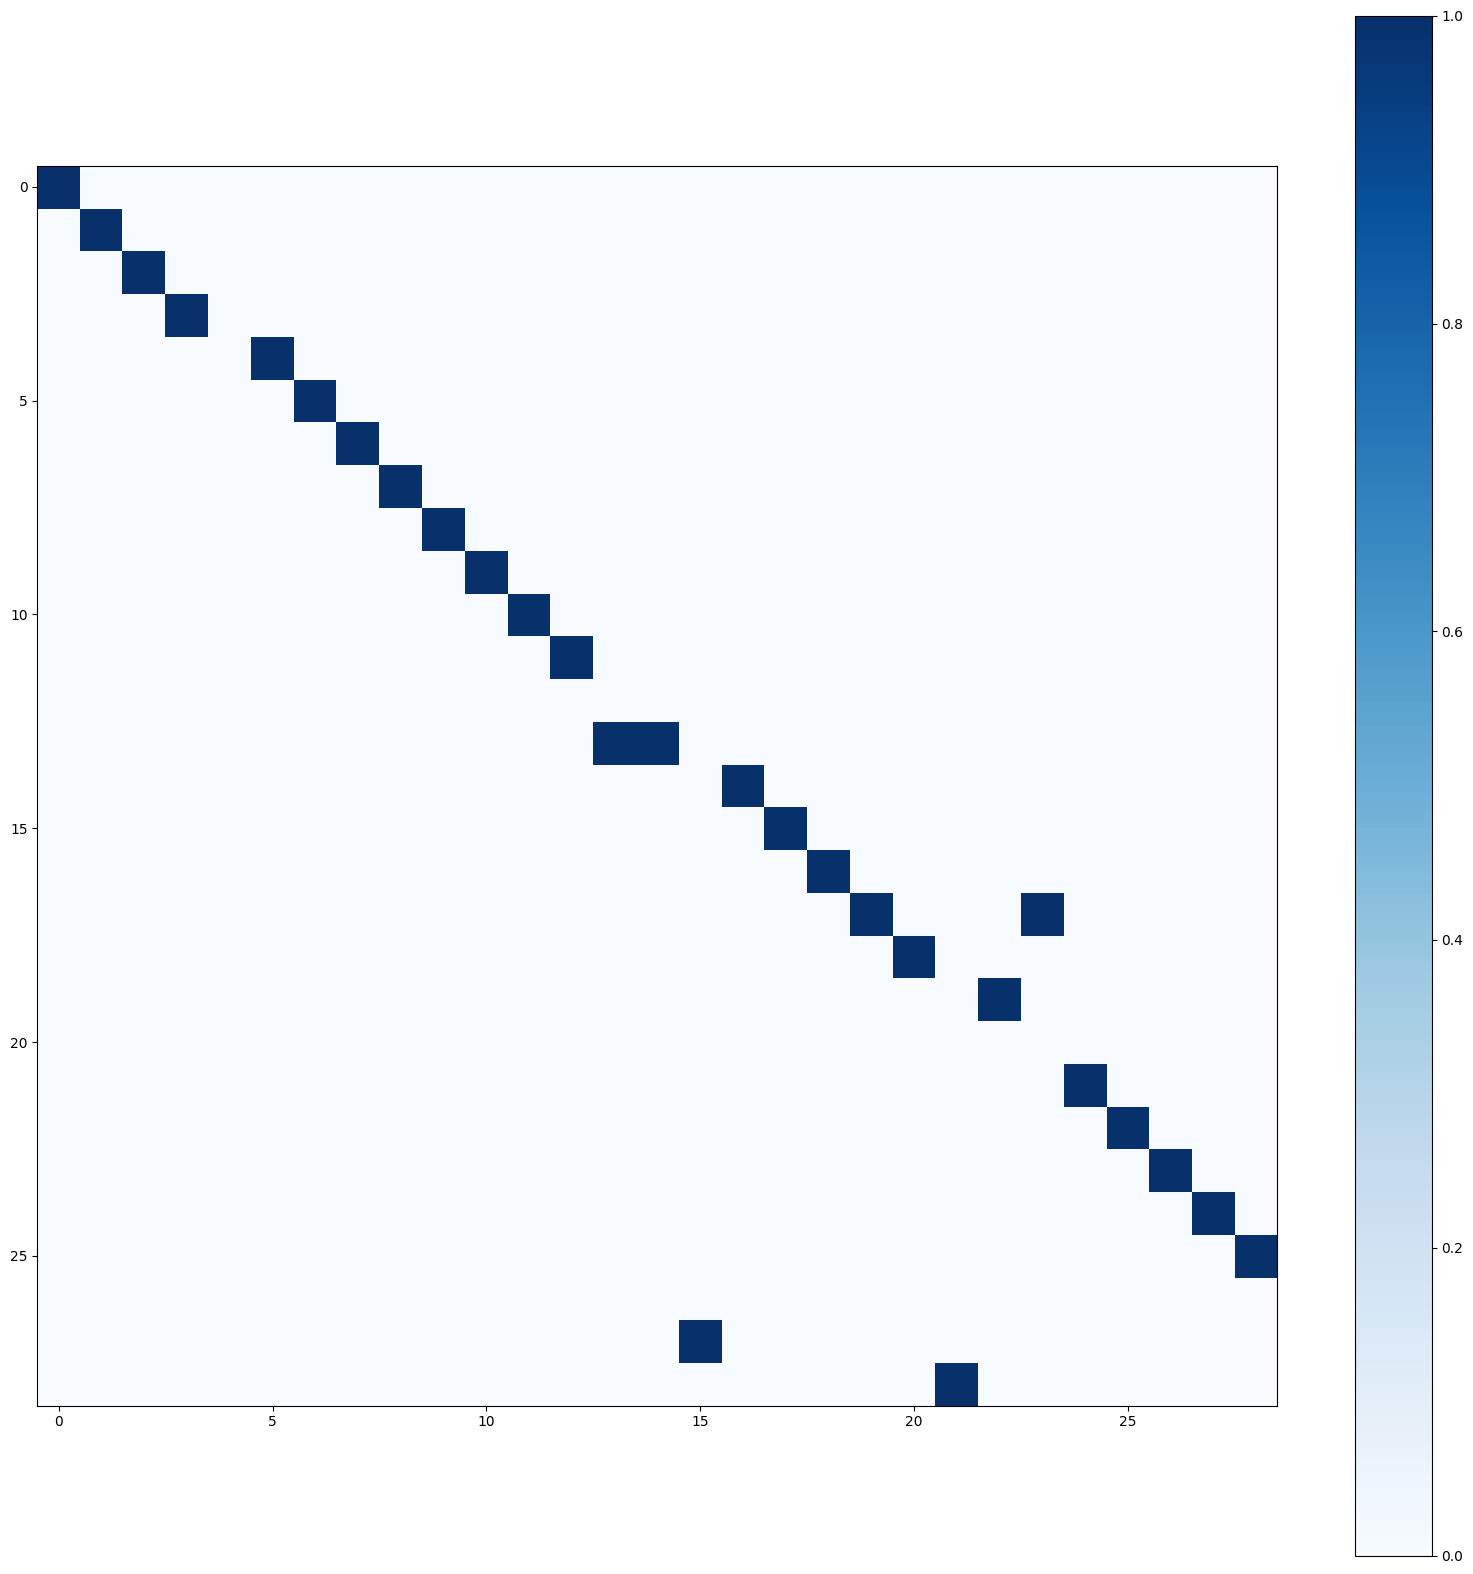

In [72]:
plot_confusion_matrix(cm,
                      normalized=True, 
                      title="Model Performance", 
                      cmap=plt.cm.Blues,
                      size=(20, 20))

In [312]:
cm

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0],
       [0, 0, 0, 0, 

In [231]:
model_test = SimpleCNN(29)

In [142]:
saved_state_dict = torch.load(checkpoint_path)

model_test.load_state_dict(saved_state_dict)
model_test.to(device)

SimpleCNN(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=29, bias=True)
  )
)

In [185]:
len(train_data_loader.dataset)

87000

In [342]:
out, lab, preds =  validate_(model, "8" ,test_dataloader)

1


1it [00:00,  6.56it/s]

Val Loss: 3.3891, Val Acc: 0.0357142873108387


In [343]:
preds

tensor([28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
        28, 28, 28, 28, 28, 28, 28, 28, 28, 28], device='cuda:0')

In [344]:
lab

tensor([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 14, 16, 17, 18,
        19, 21, 20, 22, 23, 24, 25, 26, 27, 28], device='cuda:0')

In [168]:
test_dataset[:,0]

IndexError: too many indices for tensor of dimension 1

In [176]:
out_R  =model_test(images_t.to(device))
loss = criterion(out_R, lables_t.to(device))

In [180]:
out_R

tensor([[  25.1246,  -17.7779,  -30.0222,  -46.3044,  -13.8914,  -13.6885,
          -33.4458,  -59.6534,  -17.4975,  -46.3703,  -45.5736,   -0.7717,
          -10.1311,  -16.1549,   -4.7489,  -39.6303,  -25.6147,  -51.9624,
            8.8614,   27.1093,  -26.5826,  -34.8662,  -16.8425,   10.4190,
            0.4968,   -6.2862,  -45.1497,   -7.3668,  -32.7714],
        [  -3.4972,   31.2964,  -28.4469,   -3.5423,   19.0190,  -17.2941,
          -26.2976,  -15.2658,    5.8858,  -37.4065,  -36.9119,  -33.4379,
          -15.3079,  -18.1010,  -20.4883,  -24.0730,  -25.1254,  -32.8994,
           -3.7259,  -26.4858,  -11.4578,  -49.4884,  -27.8632,  -28.3417,
          -25.3667,  -53.3120,  -26.9595,   -9.6482,  -48.6743],
        [ -37.7241,  -78.8876,   92.2101,   29.9073,    7.8852,  -19.0678,
          -12.7656,  -54.3811,  -25.9852,  -99.3926, -131.8276,  -40.5023,
          -76.2138,  -68.5968,   17.5785,  -41.7020,    5.9910, -155.1064,
           -2.1584,  -23.8685, -105.0168, -13

In [186]:
_, preds = torch.max(out_R.data, 1)

In [187]:
_

tensor([ 27.1093,  31.2964,  92.2101,  57.4406,  38.3035, 124.1692,  50.7408,
         67.6636,  45.2949,  37.1401,  25.1132,  33.7056,  26.8946,  21.5302,
         46.9998,  51.6844,  68.3438,  59.0578,   5.4448,  16.1544,  19.0294,
         35.4986,  25.2949,  20.5789,  47.1341,  14.0050,  31.2637,  24.2863],
       device='cuda:0')

In [188]:
preds

tensor([19,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 27, 13, 14, 15, 16,
        17, 28, 18, 19, 20, 21, 22, 23, 24, 25], device='cuda:0')

In [189]:
lables_t

tensor([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 15, 14, 16, 17, 18,
        19, 21, 20, 22, 23, 24, 25, 26, 27, 28])

In [177]:
loss

tensor(45.9709, device='cuda:0', grad_fn=<NllLossBackward0>)